# Esercitazione 2

### Appunti e introduzione

#### NumPy

All'interno della definizione di un oggetto posso specificare `dtype=np.float32` per, ad esempio, specificare la dimensione degli elementi della matrice. Alcuni altri comandi utili nel caso degli array (il nostro lo chiamiamo `a`):
- `type(a)` fornisce il tipo di oggetto;
- `a.shape, a.ndim, a.dtype, a.flatten` rispettivamente forma in tupla (le tuple sono immutabili, differenza rispetto alle liste), dimensione spaziale dell'oggetto (colonne), il tipo dei dati, appiattisce la matrice e la rappresenta in una sequenza continua monodimensionale (spesso esegue delle copie);
- `np.zeros(5, dtype=np.int32)` fornisce 5 elementi nulli di tipo intero;
- ugualmente ma con valore uno se uso `np.ones`
- `v = a.reshape(1,5)` trasforma l'oggetto `a` in `v` che è una matrice $1\times 5$;
- le operazioni matematiche sono incluse: ammessa la vettorializzazione per le operazioni;
- se pongo un array `a > 0` mi restituisce una lista contenente valori `bool` che rispondono alla domanda: l'elemento è maggiore di zero? utile per creare delle maschere;
- matrice identità: `np.eye(N)`;
- prodotto elemento per elemento nella matrice `A * B`;
- prodotto riga per colonna `A @ B`;
- matrice trasposta `A.T`;
- `C[i][j]` accesso ad elemento, `C[:,m]` fisso la colonna, `C[m,:]` fisso la riga, `C[m,-1]` prende l'ultimo elemento della riga `m`. Analogo per la colonna `C[-1,m]`;
- `C.flatten()[i]` appiattisce, ..., gioca un po' con questa cosa;
- se facciamo `b = a` non stiamo copiando il vettore `a` in `b`. Stiamo solo puntando alla stessa memoria. Modificando uno dei due modifichiamo entrambi;
- per una shallow copy: `c = a.view()` attenzione che anche in questo caso modificare gli elementi accade anche nell'originale. Agire sulla forma invece rimane solo vincolato a `c`;
- per una copia totale serve `d = a.copy()`. Fare attenzione a questa operazione, se i dataset sono grossi può essere un problema;

#### Funzioni per interagire con lo spazio su disco

- `np.save("myarray.npy", a)` salva nel file un oggetto binario;
- `np.savetxt("nomefile", a)` salva come testo;
- per la lettura analogo ma con `np.load` e `np.loadtxt`;


#### Matplotlib

è pensata per lavorare insieme a numpy. nell'elenco seguente segno solo le cose nuove:

- visita la sezione `performance` per andare più a fondo nel setting degli aspetti grafici;

#### Pandas

Libreria per trattare i dati (tabelle). 

- `pd.series` costruisce una tabella con una sola serie;
- `pd.DataFrame` 
- `df.index, df.to_numpy(), df.mean, df.dropna, df.fillna(value=1)` utilissimi e si spiegano da soli;
- `df[0:2]` restituisce le prime due righe;
- `mask = df["A"]>1` restituisce una lista che soddisfa la condizione, abbiamo messo un filtro al df;

#### SciPy

Fa parte dell'ecosistema che coinvolge anche NumPy e plt. 

- `scipy.optimize` contiene `curve_fit`:
- `popt, pcov = curve_fit(funzione, xdata, ydata)` cerca ottimo e covarianza fornisce un'approssimazione al risultato: non è pensato per essere numericamente esatto;
- se definiamo una loss fz. si può usare `minimize(myloss, x0, method='BFGS', options={"disp":True})`: vedi slide 16 per il codice esplicito. Questo metodo è più dettagliato e strutturabile per l'ottimizzazione;


#### TensorFlow

tf cerca di capire la morfologia delle info fornite, disegna un grafo e cerca di ottimizzare le performance del processo di ottimizzazione. Si tratta di una libreria di primitive, simili a np. 

- `x = tf.constant([1,2,3])` è una primitiva!
- `x.shape, x.dtype, x**2` sono operazioni;
- `tf.reduce_sum(x)` fa la sum ma lo fa parallelizzando il processo!
- contiene anche i metodi `zeros, ones, ...`
- conversione a np: `c = b.numpy()`

gli oggetti vengono spostati e lavorati direttamente dalla GPU se stiamo usando TensorFlow. In tf si distinguono gli oggetti in constant e Variable:

- `tf.Variable` che sono variabili;
- a questo punto possiamo definire una funzione della variabile;
- `with tf.GradientTape() as tape: \n\tab y = f(x)` lavora in automatico sulla struttura di `tf` con un grande guadagno in termini di performance;


Possiamo usare il _decorator_ `@tf.function`. Questo è in grado di ottimizzare da solo le fasi di interpretazione delle operazioni. Fatte una volta, è in grado di ripercorrere le operazioni in modo intelligente. Cambiando tipo deve però adattarsi e rifare il `tracing`. Se lavoriamo con calcoli analoghi con `@tf.function` eliminiamo la ridondanza.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import scipy as sc
import wget

sns.set_theme(font_scale=1.7, style='whitegrid')

### 2.1 - NumPy basic

In [36]:
# allocare un array a partire dalla lista [[0.5,-1][-1,2]]
mylist = [[0.5,-1],[-1,2]]

a = np.asarray(mylist, dtype=np.float32)

#visualizzarne forma e dimensione
print("shape: ", a.shape, ", dimensione: ", a.size)

#farne una deep copy
b = a.copy().flatten()

print(b)

#porre = 0 gli elementi corrispondenti agli indici pari
b[0:len(b):2]=0     

print(b)

shape:  (2, 2) , dimensione:  4
[ 0.5 -1.  -1.   2. ]
[ 0. -1.  0.  2.]


### 2.2 - 2.3 vd. Ex 01
### 2.4 - Scatter plot

In [44]:
wget.download("https://raw.githubusercontent.com/scarrazza/DL2022/main/Lecture_2/data4.dat")

100% [..............................................................................] 50997 / 50997

'data4 (1).dat'

In [47]:
data = np.loadtxt("data4.dat")

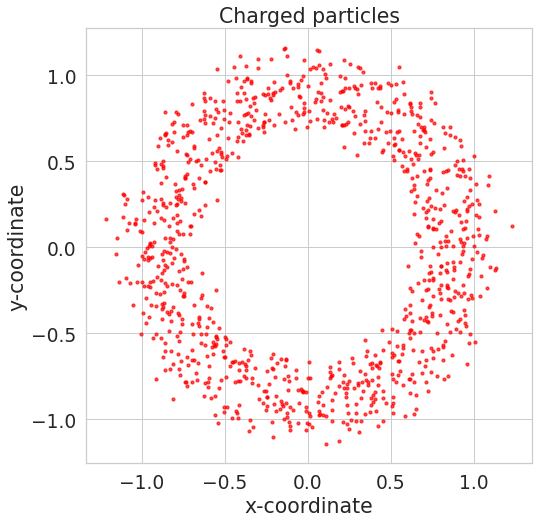

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(data.T[0],data.T[1], s=10, alpha=0.7, color='red')
plt.title('Charged particles')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.savefig('output.png')

### 2.5 - plot di funzioni

In [58]:
def f_5(x):
    return -np.sin(x*x)/x + 0.01 * x*x

In [69]:
x = np.linspace(-3,3,100)

with open('output.dat', 'w') as f:
    for ix in x:
        line = str(x) + "  " + str(f_5(x))
        f.write(line)

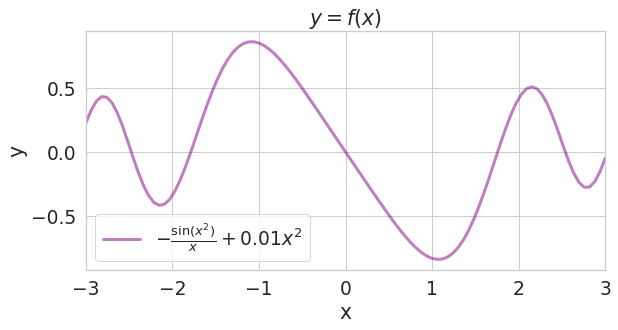

In [77]:
plt.figure(figsize=(9,5))
plt.title(r'$y=f(x)$')
plt.plot(x, f_5(x), linewidth=3, alpha=0.5, color='purple', label=r'$-\frac{\sin(x^2)}{x} + 0.01x^2$')
plt.legend()
plt.xlim(-3,3)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('output5.png')
plt.show()

### 2.6 - vd. Ex01
### 2.7 - Polynomial fit with NumPy

In [78]:
def true_function(x):
    return np.cos(1.5*np.pi*x)

In [84]:
x_train = np.random.uniform(0,1,30)

y_train = true_function(x_train) + np.random.rand()*0.1